In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('titanic.csv')

In [27]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [28]:
df.dropna()

,Cabin,Ticket,number,Survived
1,C85,PC 17599,3,1
3,C123,113803,3,1
6,E46,17463,2,0
10,G6,PP 9549,1,1
11,C103,113783,1,1
...,...,...,...,...
871,D35,11751,1,1
872,B51 B53 B55,695,6,0
879,C50,11767,A,1
887,B42,112053,3,1


In [29]:
df.isnull().sum()

Cabin       687
Ticket        0
number        0
Survived      0
dtype: int64

In [30]:
df.sample(10)

,Cabin,Ticket,number,Survived
393,D36,35273,1,1
503,NaN,4135,2,0
416,NaN,28220,6,1
601,NaN,349214,4,0
256,NaN,PC 17585,6,1
800,NaN,250647,6,0
567,NaN,349909,6,0
545,NaN,693,6,0
162,NaN,347068,A,0
748,D30,113773,5,0


In [31]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

<Axes: xlabel='number'>

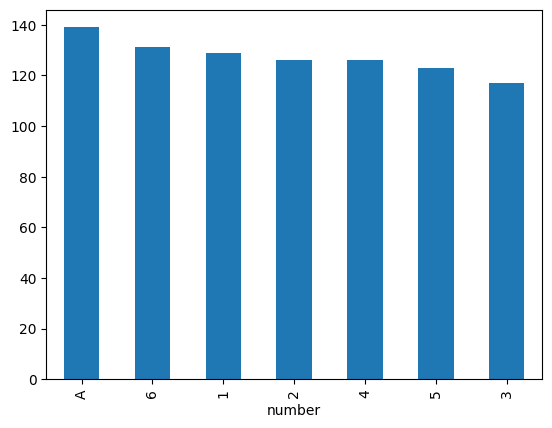

In [32]:
df['number'].value_counts().plot.bar()

# number

In [33]:
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')
df['number_categorical'] = np.where(df['number_numerical'].isnull(), df['number'], 0)
df['number_numerical'] = df['number_numerical'].fillna(0)

In [34]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,0
1,C85,PC 17599,3,1,3.0,0
2,NaN,STON/O2. 3101282,6,1,6.0,0
3,C123,113803,3,1,3.0,0
4,NaN,373450,A,0,0.0,A


# Cabin

In [35]:
df['cabin_numerical'] = df['Cabin'].str.extract('(\d+)')
df['cabin_categorical'] = df['Cabin'].str[0]

In [36]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_numerical,cabin_categorical
0,NaN,A/5 21171,5,0,5.0,0,NaN,NaN
1,C85,PC 17599,3,1,3.0,0,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,0,NaN,NaN
3,C123,113803,3,1,3.0,0,123,C
4,NaN,373450,A,0,0.0,A,NaN,NaN


# Ticket

In [37]:
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)


,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_numerical,cabin_categorical,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,0,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,0,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,0,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,0,123,C,113803.0,NaN
4,NaN,373450,A,0,0.0,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,0,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,0,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,0,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,0,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,0.0,A,NaN,NaN,237736.0,NaN


In [41]:
df['cabin_numerical']=df['cabin_numerical'].fillna(0)
df['cabin_categorical']=df['cabin_categorical'].fillna('z')

In [42]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_numerical,cabin_categorical,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,0,0,z,21171.0,A/5
1,C85,PC 17599,3,1,3.0,0,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,0,0,z,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,0,123,C,113803.0,NaN
4,NaN,373450,A,0,0.0,A,0,z,373450.0,NaN
